Priyanka R

To give the final prediction of whether a particular song is liked or not by the user

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
spotify = pd.read_csv("/content/dataSpotify.csv")

In [3]:
spotify.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [4]:
spotify.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.143,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.882,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.616,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.413,110.547,190239,5,1
194,0.747,0.6660,11,-7.845,1,0.1970,0.1300,0.000000,0.3600,0.531,77.507,177213,4,1


In [5]:
spotify = spotify.drop(['key','mode','valence','tempo','time_signature'],axis=1)
spotify.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,duration_ms,liked
0,0.803,0.6240,-6.764,0.0477,0.451,0.000734,0.1000,304524,0
1,0.762,0.7030,-7.951,0.3060,0.206,0.000000,0.0912,247178,1
2,0.261,0.0149,-27.528,0.0419,0.992,0.897000,0.1020,286987,0
3,0.722,0.7360,-6.994,0.0585,0.431,0.000001,0.1230,208920,1
4,0.787,0.5720,-7.516,0.2220,0.145,0.000000,0.0753,179413,1


In [6]:
spotify.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
duration_ms         0
liked               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


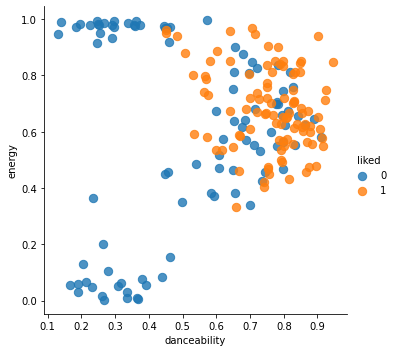

In [ ]:
sns.lmplot("danceability","energy", data=spotify, hue='liked',fit_reg=False,scatter_kws={"s":70})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


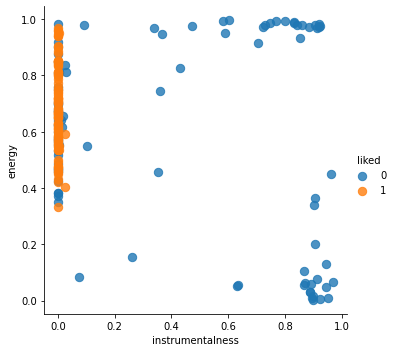

In [ ]:
sns.lmplot("instrumentalness","energy", data=spotify, hue='liked',fit_reg=False,scatter_kws={"s":70})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


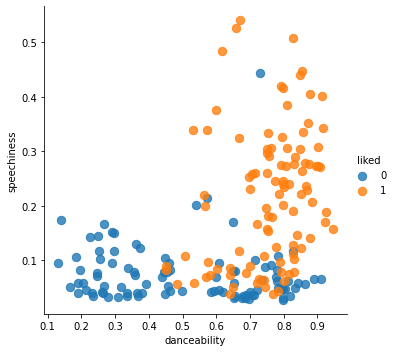

In [ ]:
sns.lmplot("danceability","speechiness", data=spotify, hue='liked',fit_reg=False,scatter_kws={"s":70})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


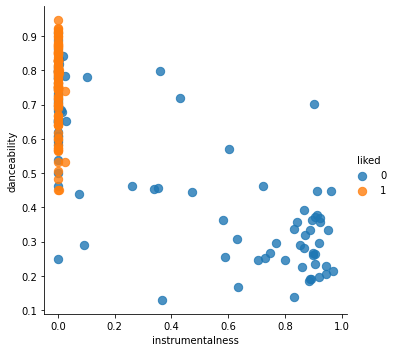

In [16]:
sns.lmplot("instrumentalness","danceability", data=spotify,hue='liked', fit_reg=False,scatter_kws={"s":70})

In [11]:
X=spotify[['danceability',	'energy',	'loudness','speechiness',	'acousticness',	'instrumentalness',	'liveness',	'duration_ms']]
Y=spotify['liked']

In [12]:
model=svm.SVC(kernel="linear")

In [13]:
model.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
answer=model.predict(X)

In [16]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(answer,Y)

0.7794871794871795